In [37]:
import json
import os
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

In [38]:
nuscenes_root = "/home/brian/data/nuscenes"
scene_token = "bebf5f5b2a674631ab5c88fd1aa9e87a"

In [39]:
with open(os.path.join(nuscenes_root, "v1.0-mini/ego_pose.json")) as f:
    poses = json.load(f)

poses_dict = {pose["token"]: pose for pose in poses}

with open(os.path.join(nuscenes_root, "v1.0-mini/sample_data.json")) as f:
    sample_data = json.load(f)
    
with open(os.path.join(nuscenes_root, "v1.0-mini/scene.json")) as f:
    scenes = json.load(f)

for scene in scenes:
    if scene["token"] == scene_token:
        break

In [40]:
first_sample_token = scene["first_sample_token"]

for sample in sample_data:
    if (
        sample["sample_token"] == first_sample_token
        and sample["prev"] == ""        and "RADAR_FRONT/" in sample["filename"]
    ):
        current_token = sample["token"]

samples_filtered = {
    sample["token"]: sample
    for sample in sample_data
    if "RADAR_FRONT/" in sample["filename"]
}

pcds = []

while current_token:
    pcds.append(samples_filtered[current_token])
    current_token = samples_filtered[current_token]["next"]

In [59]:
points = np.zeros((1,3))

In [62]:
for pcd in pcds:
    cloud = o3d.io.read_point_cloud(pcd["filename"])
    ego_pose = poses_dict[pcd["ego_pose_token"]]
    rotation = R.from_quat(ego_pose["rotation"], scalar_first=True)
    cloud.rotate(rotation.as_matrix())
    cloud.translate(ego_pose["translation"])
    points = np.vstack([points, np.asarray(cloud.points)])

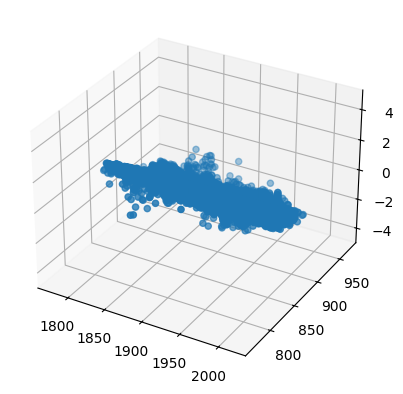

In [64]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(points[1:,0], points[1:,1], points[1:,2])